In [1]:
#########################################################################
#######################GLOBANT CHALLENGE 2###############################
#########################################################################

#Challenge 2:You need to explore the data that was inserted in the first challenge. The stakeholders ask for some specific metrics they need. You should create an end-point for each requirement.

#Requirement 1: The number of employees hired per department per month in 2021 and divided by quater.

import sqlite3
import pandas as pd

#connect to database globantdb.db
conn = sqlite3.connect('globantdb.db')

# Create a cursor
c = conn.cursor()

# Execute the query
c.execute("""select department_name, job,  strftime('%Y-%m-%d',datetime),count(*) as 'Number of employees hired' 
            from hired_employees inner join departments on hired_employees.department_id = departments.id inner join jobs on hired_employees.job_id = jobs.id 
            where datetime like '2021%' group by department_name, job,  strftime('%Y-%m-%d',datetime) order by department_name, job, datetime""")
# Fetch all the results
results = c.fetchall()

#create a new dataframe divided by quarter with the columns department_name, job, q1, q2, q3, q4
df = pd.DataFrame(results, columns=['department_name', 'job', 'datetime', 'Number of employees hired'])
df['datetime'] = pd.to_datetime(df['datetime'])
df['quarter'] = df['datetime'].dt.quarter
df = df.pivot_table(index=['department_name', 'job'], columns='quarter', values='Number of employees hired', aggfunc='sum').reset_index()
df = df.fillna(0)
df = df[['department_name', 'job', 1, 2, 3, 4]]
df.columns = ['department_name', 'job', 'Q1', 'Q2', 'Q3', 'Q4']
df = df.sort_values(by=['department_name', 'job'])

#convert Q1, Q2, Q3, Q4 columns to integer type
df['Q1'] = df['Q1'].astype(int)
df['Q2'] = df['Q2'].astype(int)
df['Q3'] = df['Q3'].astype(int)
df['Q4'] = df['Q4'].astype(int)

#show results in dataframe format
print(df)
# Close the connection
conn.close()

    department_name                            job  Q1  Q2  Q3  Q4
0        Accounting      Account Representative IV   1   0   0   0
1        Accounting                        Actuary   0   1   0   0
2        Accounting             Analyst Programmer   0   0   1   0
3        Accounting  Budget/Accounting Analyst III   0   1   0   0
4        Accounting                Cost Accountant   0   1   0   0
..              ...                            ...  ..  ..  ..  ..
933        Training                        Teacher   0   2   0   0
934        Training               Technical Writer   0   0   1   0
935        Training          VP Product Management   1   0   0   0
936        Training             VP Quality Control   0   1   0   0
937        Training              Web Developer III   0   1   0   0

[938 rows x 6 columns]


   department_id           department_name  Number of employees hired
0              8                   Support                        222
1              5               Engineering                        208
2              6           Human Resources                        204
3              7                  Services                        204
4              4      Business Development                        187
5              3  Research and Development                        151
6              9                 Marketing                        143


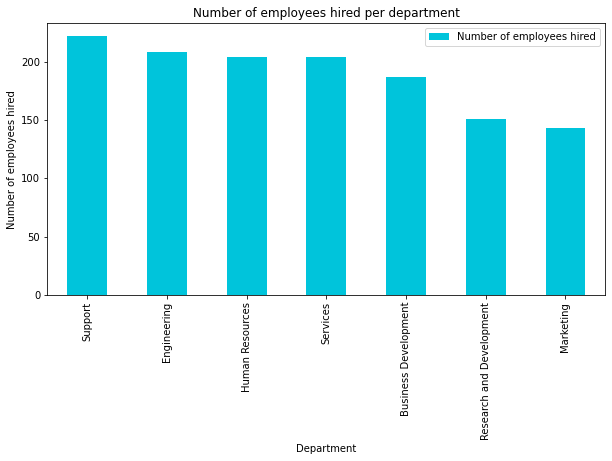

In [2]:
#########################################################################
#######################GLOBANT CHALLENGE 2###############################
#########################################################################

#Challenge 2:You need to explore the data that was inserted in the first challenge. The stakeholders ask for some specific metrics they need. You should create an end-point for each requirement.

#Requirement 2: List of ids, name and number of employees hired of each department that hired more employees than the mean of employees hired in 2021 for all the departments, ordered by the number of employees hired (descending).
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('globantdb.db')

# Create a cursor
c = conn.cursor()
# Execute the query
c.execute("""select department_id, department_name, count(*) as 'Number of employees hired'
            from hired_employees inner join departments on hired_employees.department_id = departments.id
            where datetime like '2021%' group by department_id, department_name
            having count(*) > (select avg(count_hired) from (select count(*) as count_hired 
                                                from hired_employees inner join departments on hired_employees.department_id = departments.id 
                                                where datetime like '2021%' 
                                                group by department_id,department_name))
            order by count(*) desc""")
# Fetch all the results
results = c.fetchall()

#create a new dataframe with the columns department_id, department_name, Number of employees hired
df = pd.DataFrame(results, columns=['department_id','department_name','Number of employees hired'])
df = df.sort_values(by=['Number of employees hired'], ascending=False)
print (df)


#Create a visual report
df.plot(kind='bar', x='department_name', y='Number of employees hired', figsize=(10, 5), color='#00C4DB')
plt.title('Number of employees hired per department')
plt.xlabel('Department')
plt.ylabel('Number of employees hired')
plt.show()

#results in csv format
df.to_csv('results_2.csv', index=False)

# Close the connection
conn.close()